In [ ]:
## How to avoid overfitting in Decision 

1. Hyper parametr tuning.
2. Pruning. 
3. Ensemble Methods
    3.1 Bagging Techniques e.g. Random Forest
    3.2 Boosting Techniques e.g. AdaBoost , GradBoost , XgBoost

### Pruning 

In [1]:
### Import libraries 

import numpy as np 
import pandas as pd 

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

import seaborn as sns 
import matplotlib.pyplot as plt 


In [3]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns= boston.feature_names)
df['PRICE'] = boston.target
df

C:\Users\Shridhar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
# Spilt the data 

x  = df.drop('PRICE', axis=1)
y = df['PRICE']  ### 

x_train,x_test, y_train,y_test = train_test_split(x,y, random_state=5,test_size=0.30)

In [5]:
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [6]:
### Train Model 


In [7]:
model = DecisionTreeRegressor(random_state=20)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=20)

In [8]:
### MOdel Evaluation 

In [11]:
### Accuracy on testing Data 

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")

mae = mean_absolute_error(y_test,y_pred)
print(f"MAE = {mae}")

r2 = r2_score(y_test,y_pred)
print(f"R-Sequared Value = {r2}")



MSE = 33.5808552631579
RMSE = 5.794899072732665
MAE = 3.725657894736842
R-Sequared Value = 0.6468415720154015


In [12]:
### Accuracy on training Data 

y_pred_train= model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")

mae = mean_absolute_error(y_train,y_pred_train)
print(f"MAE = {mae}")

r2 = r2_score(y_train,y_pred_train)
print(f"R-Sequared Value = {r2}")



MSE = 0.0
RMSE = 0.0
MAE = 0.0
R-Sequared Value = 1.0


In [ ]:
### Bias >> low 
Variance >> high

Overfitting Model 

### Pruning

In [15]:
ccp_dict = model.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_values = ccp_dict['ccp_alphas']
len(ccp_alpha_values)

321

In [16]:
x_train.shape

(354, 13)

In [17]:

x_train,x_test, y_train,y_test = train_test_split(x,y, random_state=10,test_size=0.25)

In [23]:
ccp_dict = model.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_values = ccp_dict['ccp_alphas']

r2_score_test_list = []
r2_score_train_list = []
ccp_alpha_val = []

for val in ccp_alpha_values:
    dt_reg = DecisionTreeRegressor(ccp_alpha=val, random_state=20)
    dt_reg.fit(x_train,y_train)
    ######## R2 score for training & testing 
    r2_score_test = dt_reg.score(x_test,y_test)
    r2_score_train = dt_reg.score(x_train,y_train)
    ###### Append to list 
    r2_score_test_list.append(r2_score_test)
    r2_score_train_list.append(r2_score_train)
    ccp_alpha_val.append(val)
    
    ####### Print
print(f"CCP\t R2_score Test \t R2_Score Train")
    print(f"{val}\t {r2_score_test} \t {r2_score_train}")

CCP	 R2_score Test 	 R2_Score Train
0.0	 0.6700161476339753 	 1.0
CCP	 R2_score Test 	 R2_Score Train
8.998958130998631e-16	 0.6700161476339753 	 1.0
CCP	 R2_score Test 	 R2_Score Train
1.1998610841331507e-15	 0.6700161476339753 	 1.0
CCP	 R2_score Test 	 R2_Score Train
1.7997916261997262e-15	 0.6700161476339753 	 1.0
CCP	 R2_score Test 	 R2_Score Train
2.3997221682663013e-15	 0.6700161476339753 	 1.0
CCP	 R2_score Test 	 R2_Score Train
1.3192612135691342e-05	 0.6700161476339753 	 0.9999998305893765
CCP	 R2_score Test 	 R2_Score Train
1.3192612136291271e-05	 0.6700161476339753 	 0.999999661178753
CCP	 R2_score Test 	 R2_Score Train
1.3192612136441254e-05	 0.6700161476339753 	 0.9999994917681295
CCP	 R2_score Test 	 R2_Score Train
1.3192612136591238e-05	 0.6700161476339753 	 0.9999991529468825
CCP	 R2_score Test 	 R2_Score Train
1.3192612136591238e-05	 0.6700161476339753 	 0.9999991529468825
CCP	 R2_score Test 	 R2_Score Train
1.3192612137041185e-05	 0.6700392512665436 	 0.9999986447150

CCP	 R2_score Test 	 R2_Score Train
0.00028144239225970325	 0.6718007002977413 	 0.9999097041376754
CCP	 R2_score Test 	 R2_Score Train
0.00028144239226097817	 0.6718007002977413 	 0.9999060900443741
CCP	 R2_score Test 	 R2_Score Train
0.000316622691293038	 0.6718370342156266 	 0.9999020241894102
CCP	 R2_score Test 	 R2_Score Train
0.00031662269129348797	 0.6718196571244641 	 0.9998979583344462
CCP	 R2_score Test 	 R2_Score Train
0.00032321899735713406	 0.6720729578481994 	 0.9998938077741705
CCP	 R2_score Test 	 R2_Score Train
0.0003232189973604337	 0.6720422023715111 	 0.9998896572138948
CCP	 R2_score Test 	 R2_Score Train
0.0003232189973613336	 0.6720245784466674 	 0.9998855066536191
CCP	 R2_score Test 	 R2_Score Train
0.0003232189973640333	 0.6720245784466674 	 0.9998813560933434
CCP	 R2_score Test 	 R2_Score Train
0.0003298153034279794	 0.6718962249323989 	 0.9998771208277559
CCP	 R2_score Test 	 R2_Score Train
0.0003298153034296292	 0.6719821230534864 	 0.9998728855621685
CCP	 R2

CCP	 R2_score Test 	 R2_Score Train
0.0036983289357963404	 0.6771614358211471 	 0.9980607771641051
CCP	 R2_score Test 	 R2_Score Train
0.00369832893579784	 0.6771614358211471 	 0.9980132857193178
CCP	 R2_score Test 	 R2_Score Train
0.0036994283201420065	 0.6771160129385976 	 0.9979182745946391
CCP	 R2_score Test 	 R2_Score Train
0.0038126649076494473	 0.6780223862162784 	 0.9978693149244481
CCP	 R2_score Test 	 R2_Score Train
0.003878627968343202	 0.6777804892086184 	 0.9978195082011396
CCP	 R2_score Test 	 R2_Score Train
0.003957783641157951	 0.6775316808578825 	 0.9977686850140901
CCP	 R2_score Test 	 R2_Score Train
0.003990765171505277	 0.6758232955829684 	 0.9977174383004819
CCP	 R2_score Test 	 R2_Score Train
0.00406684256816665	 0.6751856862266725 	 0.9976652146522782
CCP	 R2_score Test 	 R2_Score Train
0.0041372031662285196	 0.6750733354336291 	 0.9976120874807491
CCP	 R2_score Test 	 R2_Score Train
0.004459102902376014	 0.6750733354336291 	 0.9975548266900067
CCP	 R2_score Test

CCP	 R2_score Test 	 R2_Score Train
0.04419041336849464	 0.6836440489551208 	 0.979579398487155
CCP	 R2_score Test 	 R2_Score Train
0.04441284196641203	 0.6830101781641735 	 0.9790090787376916
CCP	 R2_score Test 	 R2_Score Train
0.04451770587418642	 0.6839040234387019 	 0.97843741239668
CCP	 R2_score Test 	 R2_Score Train
0.044859278803871326	 0.6803783388983045 	 0.9778613598065781
CCP	 R2_score Test 	 R2_Score Train
0.04827546573918706	 0.6808253282891221 	 0.9772414388488867
CCP	 R2_score Test 	 R2_Score Train
0.049393239785716844	 0.68038226825705 	 0.9766071641910953
CCP	 R2_score Test 	 R2_Score Train
0.04989775725593576	 0.6817667090086448 	 0.975966410860369
CCP	 R2_score Test 	 R2_Score Train
0.051955005197063746	 0.676422622214333 	 0.9752992397396874
CCP	 R2_score Test 	 R2_Score Train
0.05295030782761538	 0.6757827880637899 	 0.9746192876141938
CCP	 R2_score Test 	 R2_Score Train
0.05568921191934201	 0.6761397352733798 	 0.9739041643303997
CCP	 R2_score Test 	 R2_Score Trai

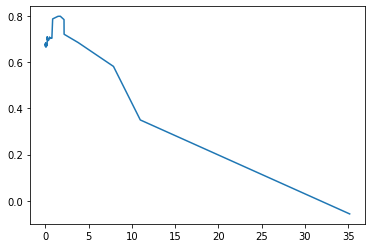

In [24]:
plt.plot(ccp_alpha_val,r2_score_test_list)

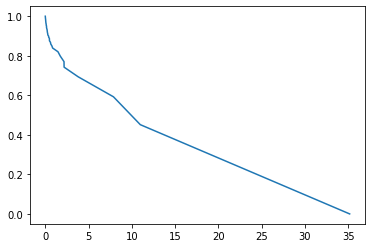

In [25]:
plt.plot(ccp_alpha_val,r2_score_train_list)

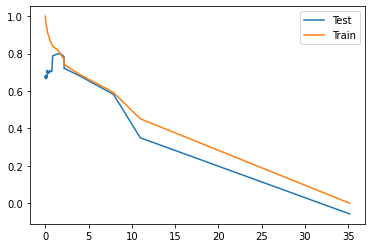

In [32]:
plt.plot(ccp_alpha_val,r2_score_test_list,label='Test')
plt.plot(ccp_alpha_val,r2_score_train_list,label = 'Train')
plt.legend()